# Load Datasets

This data set contains 15 packets from every flow in the original data set, with a label on each row

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hind.makarem\Desktop\Server files\Test_folders\N_pacekt_files\Nmax_packet_15.csv")

In [2]:
b=['udp.srcport','udp.dstport','tcp.dstport','tcp.srcport',]

for n in range(1,16):
    for i in b:
        a=i+str(n)
        del df[a]

In [3]:
del df['Unnamed: 0']

In [4]:
df

,ip.flags1,ip.ttl1,ip.proto1,ip.checksum1,udp.length1,udp.checksum1,udp.time_relative1,udp.time_delta1,frame.number1,ip.len2,...,ip.flags15,ip.ttl15,ip.proto15,ip.checksum15,udp.length15,udp.checksum15,udp.time_relative15,udp.time_delta15,frame.number15,Label
0,0.535101,-1.196927,-1.495122,0.465960,0.071326,-0.976813,-0.219158,-0.106434,-0.505705,-0.418538,...,-0.769855,-0.922204,-0.933588,-0.876479,-0.483307,-0.605744,-0.430934,-0.103710,-0.387276,Malicious C&C
1,0.535101,-1.196927,-1.495122,-1.499103,0.071326,-0.976813,-0.219158,-0.106434,-0.505686,-0.418538,...,-0.769855,-0.922204,-0.933588,-0.876479,-0.483307,-0.605744,-0.430934,-0.103710,-0.387276,Malicious C&C
2,0.535101,-1.196927,-1.495122,-1.466063,0.071326,-0.976813,-0.219158,-0.106434,-0.505667,-0.418538,...,-0.769855,-0.922204,-0.933588,-0.876479,-0.483307,-0.605744,-0.430934,-0.103710,-0.387276,Malicious C&C
3,0.535101,-1.196927,-1.495122,-1.670508,0.071326,-0.976813,-0.219158,-0.106434,-0.505705,-0.418538,...,-0.769855,-0.922204,-0.933588,-0.876479,-0.483307,-0.605744,-0.430934,-0.103710,-0.387276,Malicious C&C
4,0.535101,-1.196927,0.668842,1.327848,-1.191617,1.210572,-0.219158,-0.106434,13.163456,-0.553660,...,-0.769855,-0.922204,-0.933588,-0.876479,-0.483307,-0.605744,-0.430934,-0.103710,-0.387276,Malicious C&C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634220,0.535101,-1.196927,0.668842,1.439304,-0.996065,2.106035,2.602882,0.138355,2.592271,-0.553660,...,-0.769855,-0.922204,-0.933588,-0.876479,-0.483307,-0.605744,-0.430934,-0.103710,-0.387276,benign
634221,0.535101,0.834947,0.668842,-0.882324,0.098307,-0.140181,-0.516522,-0.106435,-0.490577,-0.553660,...,1.298946,1.200244,1.258490,-0.195766,0.682374,0.641209,0.141424,-0.103295,-0.361623,benign
634222,0.535101,0.834947,0.668842,-0.449780,0.071326,-0.705188,0.032741,-0.106436,-0.462121,-0.553660,...,1.298946,1.200244,1.258490,0.183548,0.682374,0.641209,1.193022,-0.103292,-0.313534,benign
634223,0.535101,-1.196927,0.668842,-1.249583,-0.996065,1.252449,-0.641490,1.222027,-0.483092,-0.553660,...,1.298946,-0.389511,1.258490,1.759605,-0.283680,0.666675,0.005371,4.255165,-0.339701,benign


Class=0, n=31612 (4.984%)
Class=5, n=402076 (63.396%)
Class=2, n=149734 (23.609%)
Class=1, n=5000 (0.788%)
Class=3, n=34061 (5.370%)
Class=4, n=11742 (1.851%)


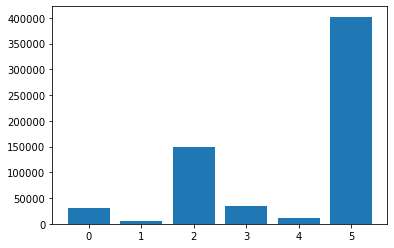

In [5]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [6]:
dummies = pd.get_dummies(y) # Classification
y2 = dummies.values

# Random Forest classifier

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
 
# Create training/ test data split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=1, stratify=y)

# Create an instance of Random Forest Classifier
forest = RandomForestClassifier()

# Fit the model
forest.fit(X_train, y_train)
 
# Measure model performance
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.994


# Evaluating Model:
    The Confusion Matrix, Accuracy, Precision, and Recall

In [8]:
from sklearn import metrics
import numpy as np

pred = np.argmax(y_pred,axis=1) 
# raw probabilities to chosen class (highest probability)
y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score*100))

Accuracy score: 99.42764942081695


In [9]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_compare, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95719963 0.97711978 1.         0.99990214 0.88859204 0.99819298]
recall: [0.99040489 0.968      1.         1.         0.94408175 0.99375741]
fscore: [0.9735192  0.97253851 1.         0.99995107 0.91549683 0.99597025]
support: [  9484   1500  44920  10218   3523 120623]


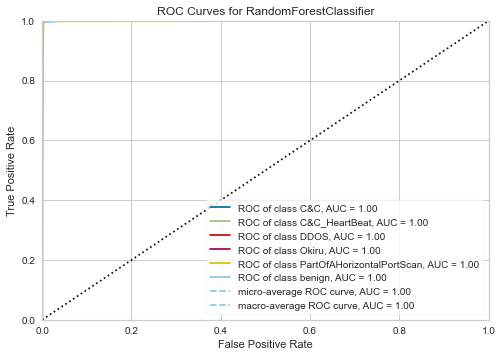

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['C&C', 'C&C_HeartBeat', 'DDOS', 'Okiru',
                'PartOfAHorizontalPortScan', 'benign'],
       estimator=RandomForestClassifier())

In [10]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model =  RandomForestClassifier()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign'])

In [11]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [12]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[ 7831,     1,     0,     0,     5,    66],
       [   15,  1217,     0,     0,    13,     5],
       [    0,     0, 37434,     0,     0,     0],
       [    0,     0,     0,  8515,     0,     0],
       [    1,    22,     0,     1,  2810,   102],
       [  264,     6,     0,     0,   332, 99917]], dtype=int64)

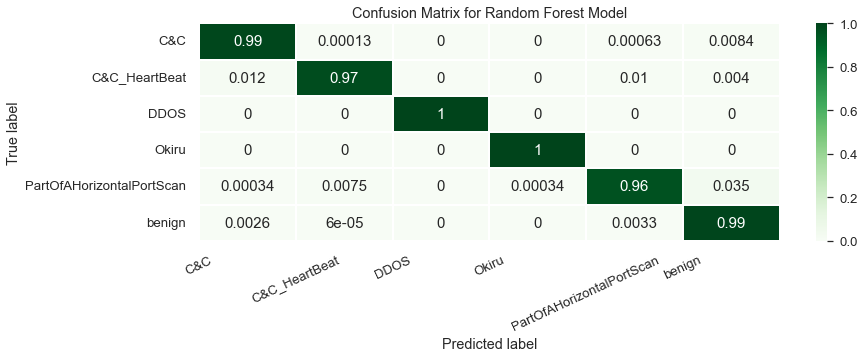

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# XGBoost Classifier

In [7]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

model = XGBClassifier(objective='multi:softmax',num_class=6) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.48%


# Evaluating Model:
    The Confusion Matrix, Accuracy, Precision, and Recall

In [8]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95534506 0.98289738 1.         0.99985367 0.88556823 0.99928744]
recall: [0.99467752 0.98388721 1.         1.         0.97955633 0.99296912]
fscore: [0.97461462 0.98339205 1.         0.99992683 0.93019413 0.99611826]
support: [ 6388   993 29830  6833  2299 80502]


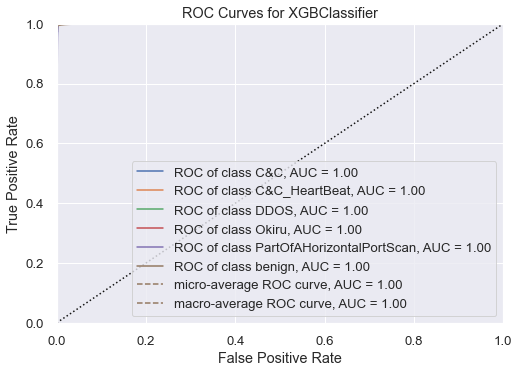

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['C&C', 'C&C_HeartBeat', 'DDOS', 'Okiru',
                'PartOfAHorizontalPortScan', 'benign'],
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))

In [20]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model =  XGBClassifier()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign'])

In [9]:
# Make predictions for the test set
y_pred_test = model.predict(X_test)

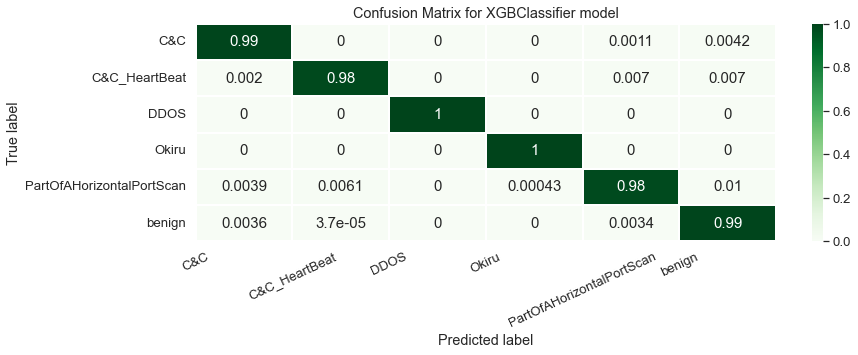

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBClassifier model')
plt.show()

# LSTM

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
df = df.replace(np.inf, df.median()) 
#del df['num']
df = df.fillna(df.median())
x_columns = df.columns.drop('Label')
x = df[x_columns].values
dummies = pd.get_dummies(df['Label']) # Classification
products = dummies.columns
y = dummies.values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32) 
X_train = X_train.reshape(-1,1,209) 
X_test= X_test.reshape(-1,1,209) 

C:\Users\hind.makarem\AppData\Local\Temp\ipykernel_3136\594523706.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.replace(np.inf, df.median())
C:\Users\hind.makarem\AppData\Local\Temp\ipykernel_3136\594523706.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [25]:
import tensorflow as tf

BATCH_SIZE = 20 
EPOCHS = 2 # Used less epochs for testing purposes

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
print("Fit the model on training data")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
print(f"History: {history.history}")
print("Evaluating on test data")
results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test, steps=len(X_test), verbose=0)
print('Model predictions', predictions)
prediction_class = tf.argmax(predictions, axis=1)
print('Class of predictions', prediction_class)
most_frequent = np.bincount(prediction_class).argmax()
print('Most frequent class: ', most_frequent)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               124000    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 134,706
Trainable params: 134,706
Non-trainable params: 0
_________________________________________________________________
Fit the model on training data
History: {'loss': [0.028589580208063126, 0.014058589935302734], 'accuracy': [0.9908759593963623, 0.9955347180366516]}
Evaluating on test data
7928/7928

# Evaluating Deep Learning Models:
    The Confusion Matrix, Accuracy, Precision, and Recall

In [28]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

4955/4955 [==============================] - 5s 934us/step
[[  7772      0      0      0     59     12]
 [     0   1192      0      0      7      0]
 [     0      0  37384      0      0      1]
 [     0      0      0   8552      0      0]
 [    14      1      1      0   2850      8]
 [     9     42     26      0    206 100421]]


In [29]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99704939 0.96518219 0.99927829 1.         0.91287636 0.99979092]
recall: [0.99094734 0.9941618  0.99997325 1.         0.99164927 0.99718978]
fscore: [0.993989   0.97945768 0.99962565 1.         0.95063376 0.99848866]
support: [  7843   1199  37385   8552   2874 100704]


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy : {}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report : ")
print(classification_report(y_test, y_pred, target_names=['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, y_pred))

Test Accuracy : 0.9975655442522248

Classification Report : 
                           precision    recall  f1-score   support

                      C&C       1.00      0.99      0.99      7843
            C&C_HeartBeat       0.97      0.99      0.98      1199
                     DDOS       1.00      1.00      1.00     37385
                    Okiru       1.00      1.00      1.00      8552
PartOfAHorizontalPortScan       0.91      0.99      0.95      2874
                   benign       1.00      1.00      1.00    100704

                 accuracy                           1.00    158557
                macro avg       0.98      1.00      0.99    158557
             weighted avg       1.00      1.00      1.00    158557


Confusion Matrix : 
[[  7772      0      0      0     59     12]
 [     0   1192      0      0      7      0]
 [     0      0  37384      0      0      1]
 [     0      0      0   8552      0      0]
 [    14      1      1      0   2850      8]
 [     9     42     

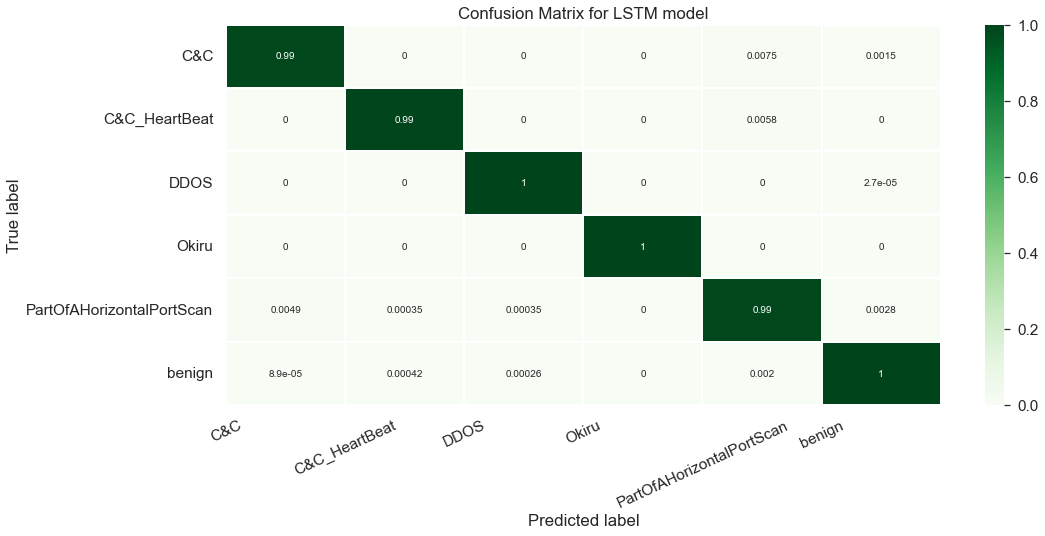

In [31]:
# Get and reshape confusion matrix data
matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LSTM model')
plt.show()

In [28]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

4923/4923 [==============================] - 5s 960us/step


In [26]:
y_pred = model.predict(X_train)
y_pred = y_pred.argmax(axis=-1)
y_train = y_train.argmax(axis=-1)

14865/14865 [==============================] - 14s 942us/step


ROC AUC score: 0.9979460495858369


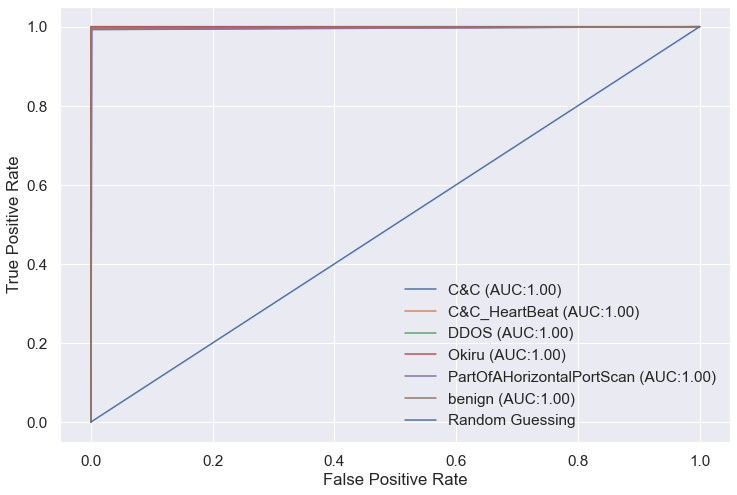

In [27]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target=  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx], y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_train, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# K-Neighbors Classifier

In [32]:
from sklearn.model_selection import train_test_split#split dataset into train and test data
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier

X_train,X_test , y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1, stratify=y2)
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn.predict(X_test)
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9990303125862273

# Evaluating Model:
    The Confusion Matrix, Accuracy, Precision,AUC and Recall

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)#train model with cv of 6
cv_scores = cross_val_score(knn_cv, X, y2, cv=6)#print each cv score (accuracy) and average them
print(cv_scores)

[1.         0.88920003 0.9974457  0.99829713 0.85284379 0.99987702]


In [33]:
from sklearn import metrics
import numpy as np
pred = knn.predict(X_test)
pred = np.argmax(pred,axis=1) 
# raw probabilities to chosen class (highest probability)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score*100))

Accuracy score: 99.90460798612479


In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_compare, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99762883 1.         0.99989982 1.         0.96908939 0.99963916]
recall: [0.99810217 0.998      0.99986643 1.         0.98807496 0.99906734]
fscore: [0.99786544 0.998999   0.99988312 1.         0.97849009 0.99935317]
support: [ 6323  1000 29947  6812  2348 80415]


In [35]:
pred = knn.predict(X_test)

In [36]:
pred = np.argmax(pred,axis=1)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# View confusion matrix for test data and predictions
cm=confusion_matrix(y_compare, pred)

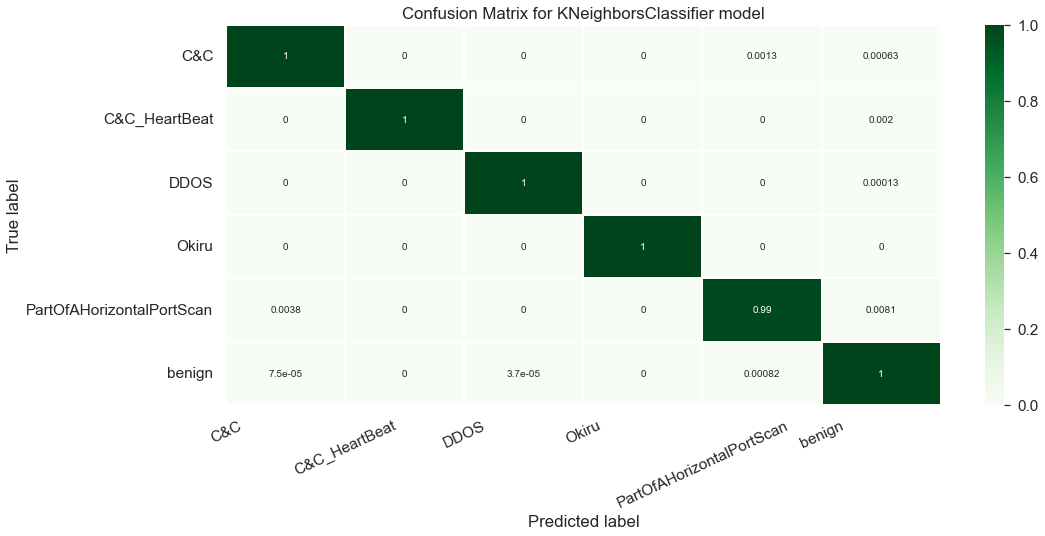

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get and reshape confusion matrix data
matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNeighborsClassifier model')
plt.show()

In [39]:
y_pred = knn.predict(X_train)
y_pred = y_pred.argmax(axis=-1)
y_train = y_train.argmax(axis=-1)

ROC AUC score: 0.9992334764037777


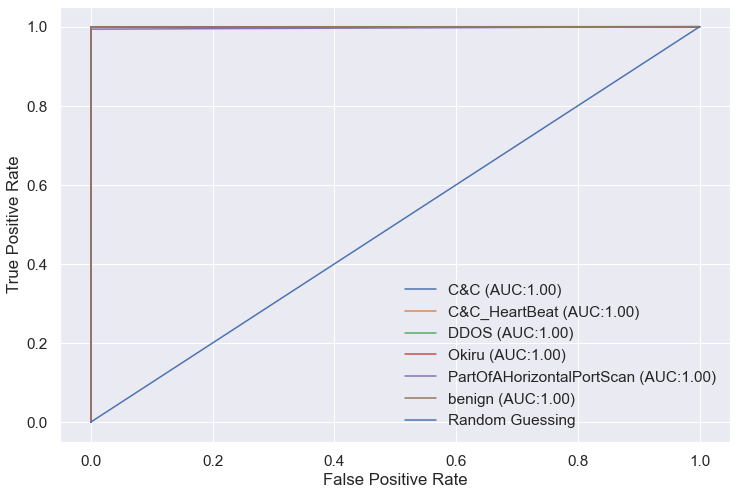

In [40]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target=  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx], y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_train, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()